## Question 1: Data Exploration

In [3]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#read the data
heart_dataset = pd.read_csv('heart_disease_missing.csv')

##### Using info, describe and head methods to have an overview of data

In [5]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  205 non-null    float64
 4   chol      202 non-null    float64
 5   fbs       212 non-null    int64  
 6   restecg   207 non-null    float64
 7   thalach   208 non-null    float64
 8   exang     212 non-null    int64  
 9   oldpeak   200 non-null    float64
 10  slope     210 non-null    float64
 11  ca        212 non-null    int64  
 12  thal      211 non-null    float64
 13  target    212 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 23.3 KB


In [5]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,205.000000,202.000000,212.000000,207.000000,208.000000,212.000000,200.000000,210.000000,212.000000,211.000000,212.000000
mean,54.311321,0.688679,0.957547,131.784610,244.133256,0.132075,0.560386,149.647978,0.344340,1.113106,1.423810,0.731132,2.349112,0.542453
std,9.145339,0.464130,1.022537,18.057222,46.444257,0.339374,0.535149,22.076206,0.476277,1.255908,0.623622,1.038762,0.602117,0.499374
min,29.000000,0.000000,0.000000,93.944184,126.085811,0.000000,0.000000,88.032613,0.000000,-0.185668,0.000000,0.000000,0.858554,0.000000
25%,47.000000,0.000000,0.000000,119.968114,211.969594,0.000000,0.000000,135.946808,0.000000,0.050778,1.000000,0.000000,1.949795,0.000000
50%,55.000000,1.000000,1.000000,130.010256,241.467023,0.000000,1.000000,151.939216,0.000000,0.726060,1.000000,0.000000,2.078759,1.000000
75%,61.000000,1.000000,2.000000,139.965470,272.484222,0.000000,1.000000,165.260092,1.000000,1.816733,2.000000,1.000000,2.970842,1.000000
max,77.000000,1.000000,3.000000,192.020200,406.932689,1.000000,2.000000,202.138041,1.000000,6.157114,2.000000,4.000000,3.277466,1.000000


In [99]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.100312,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0


### [CM1] Heart: Choose your own subset of 3-5 features for the plot which highlight some interesting pattern. You will need to explore diferent subsets of features or their correlation, distribution etc, in order to choose a set of features.

To select a subset of features, lets explore the features by their variable-type:
1. Numeric - age, oldpeak, trestbps, chol , thalach :
We will construct a pairplot of these features to check their correlation and their impact on the target variable.
2. For Binary/Categorical and Ordinal values: 
We will construct histograms and visualise their relationship with the target variable


In [6]:
#import seaborn library
import seaborn as sns 

bins = ['sex', 'fbs', 'exang']
cats = ['cp', 'restecg', 'slope', 'thal']
ords = ['ca']
nums = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
target = ['target']

In order to understand correlation between the features, we will construct a pairplot of columns with continous values  

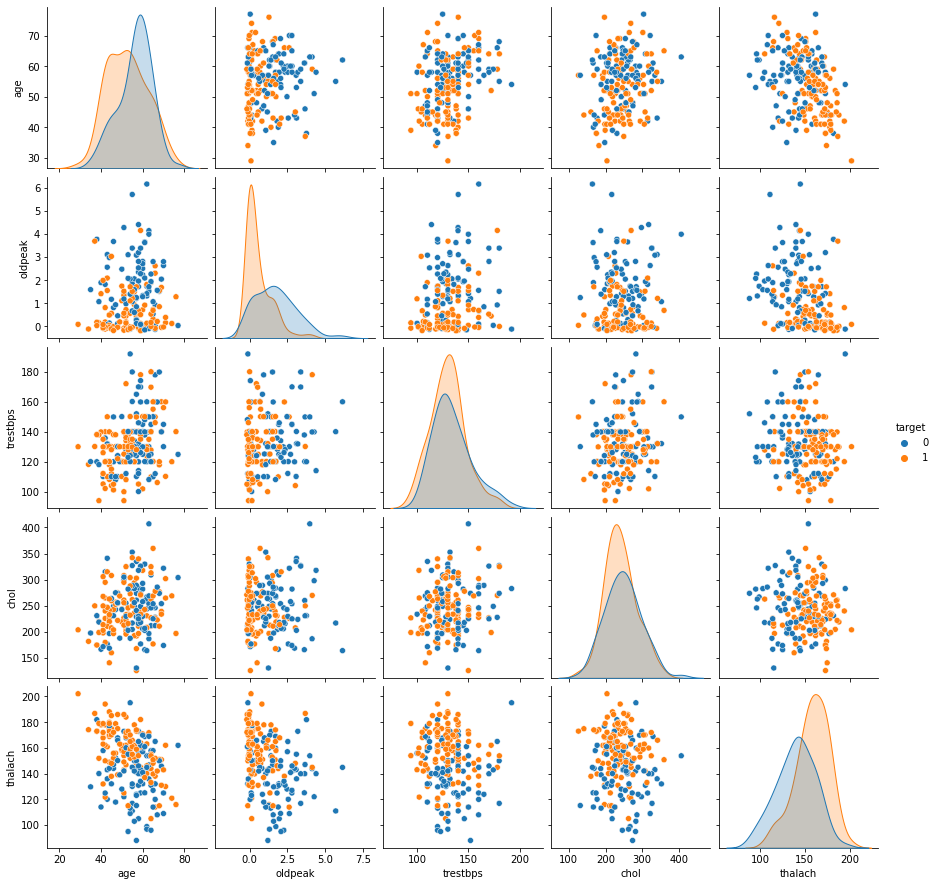

In [177]:
sns.pairplot(heart_dataset[nums+target], hue = 'target')

Analysing the pairplot, we can say that there is absence of any strong positive/negative correlation. But we can infer from the scatter plots that generally heart disease is common in people with lower level of oldpeak feature. Similarly we can say that heart disease is quite common in people with higher levels of thalch.

In [9]:
heart_dataset[nums+target].corr()

,age,oldpeak,trestbps,chol,thalach,target
age,1.000000,0.131735,0.335944,0.185861,-0.382280,-0.196967
oldpeak,0.131735,1.000000,0.164742,0.048991,-0.351900,-0.454241
trestbps,0.335944,0.164742,1.000000,0.162162,-0.100284,-0.118476
chol,0.185861,0.048991,0.162162,1.000000,-0.057679,-0.078063
thalach,-0.382280,-0.351900,-0.100284,-0.057679,1.000000,0.415354
target,-0.196967,-0.454241,-0.118476,-0.078063,0.415354,1.000000


Plotting other features as histograms to see their relationship with the target variable

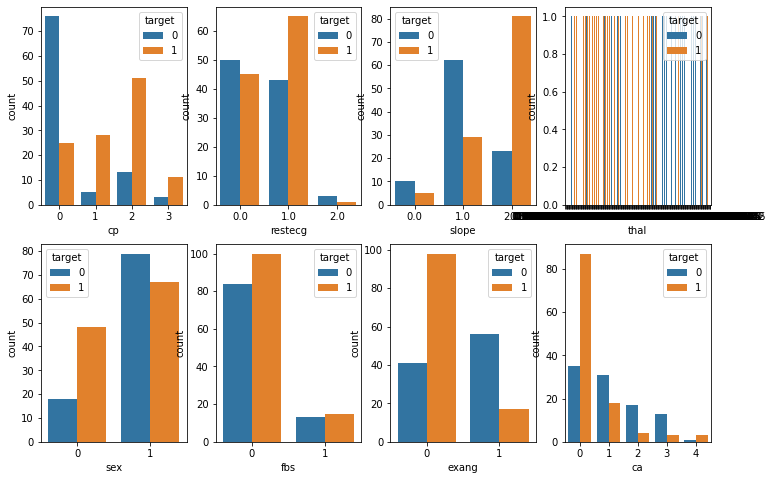

In [12]:
fig, axs = plt.subplots(2,4, figsize=(12, 8))
axs = axs.flatten()
index = 0
for feature in cats+bins+ords:
    sns.countplot(data = heart_dataset, x = feature, hue= 'target', ax= axs[index])
    index+=1

From the plots we can infer that:
1. People with blood sugar level < 120 are more prone to heart diseases
2. People with Asymptomatic angina (cp=0), are less prone to heart disease
3. It seems that females are at a greater risk of heart disease than males.
4. thal feature has continous numeric values, although it is supposed to be categorical in nature. This should be handled in Data Cleaning.
5. People who don't have exercise induced angina (exang = 0) are at higher risk of heart diseases.

### [CM1] Heart: Justify why you chose those features.

In order to choose the subset of the features to build our Model, we need to choose the set of features that are best representation of our data. They should be correlated with the target variable and also uncorrelated among themselves.
After analysing the pairplot, correlation coefficients and the histograms , the following features can be selected:
1.	thalach - It shows a positive correlation with the target variable.(+0.42)
2.	oldpeak - It shows a negative correaltion with the target variable.(-0.45)
3.	cp - It is evident from the countplot above that people with cp=0 are at lesser risk of heart diseases, whereas people with cp= 1,2 or 3 are at higher risk of heart diseases
4.	ca - countplot shows that people with ca =0 are at a very high risk of heart diseases, when compared to people with ca=1,2,3 or 4.
5.	slope – The graphical plots above show that people with flat slope of peak exercise st segment (slope =2) have more risk of heart diseases compared to people with slope =0 or 1

### [CM2] Heart: Calculate and report the correlation coefficient for the pair of features. To what extent are the features correlated? Do you find any interesting or significant relationships?

<AxesSubplot:>

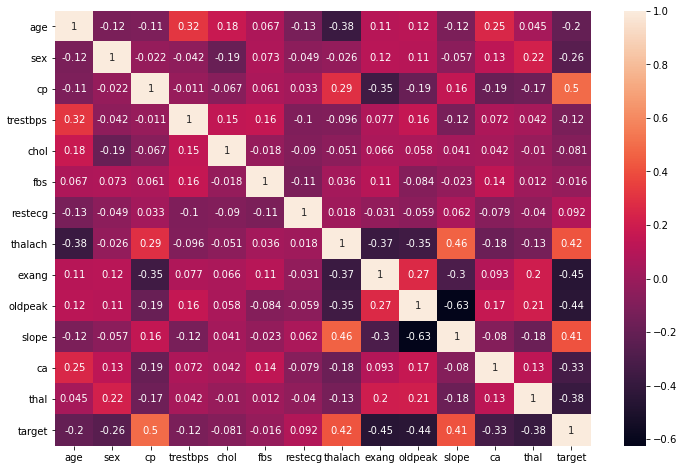

In [18]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,8))
sns.heatmap(heart_dataset.corr(), annot = True)

There is a positive correlation between the following features and the target variable:
   1. cp (0.49)
   2. thalach (0.42)
   3. slope (0.42)

There is a negative correlation between following features and the target variable:
   1. exang(-0.45)
   2. oldpeak(-0.45)

Also the features slope and thalch are positively correlated and there is a negative correlation between slope and oldpeak features.

### [CM2] Heart: Calculate the mean, variance, skew, kurtosis for the datasets and explain your observation about the nature of data and the relationships between the features of the dataset.

Calculating mean, variance, skew and kurtosis for numerical features in the data:

In [15]:
heart_dataset[nums].mean()

age          54.311321
oldpeak       1.113106
trestbps    131.784610
chol        244.133256
thalach     149.647978
dtype: float64

In [16]:
heart_dataset[nums].var()

age           83.637217
oldpeak        1.577304
trestbps     326.063277
chol        2157.069050
thalach      487.358850
dtype: float64

In [17]:
heart_dataset[nums].skew()

age        -0.106027
oldpeak     1.224053
trestbps    0.672687
chol        0.333700
thalach    -0.394100
dtype: float64

In [18]:
heart_dataset[nums].kurtosis()

age        -0.561563
oldpeak     1.363172
trestbps    0.603542
chol        0.254413
thalach    -0.214108
dtype: float64

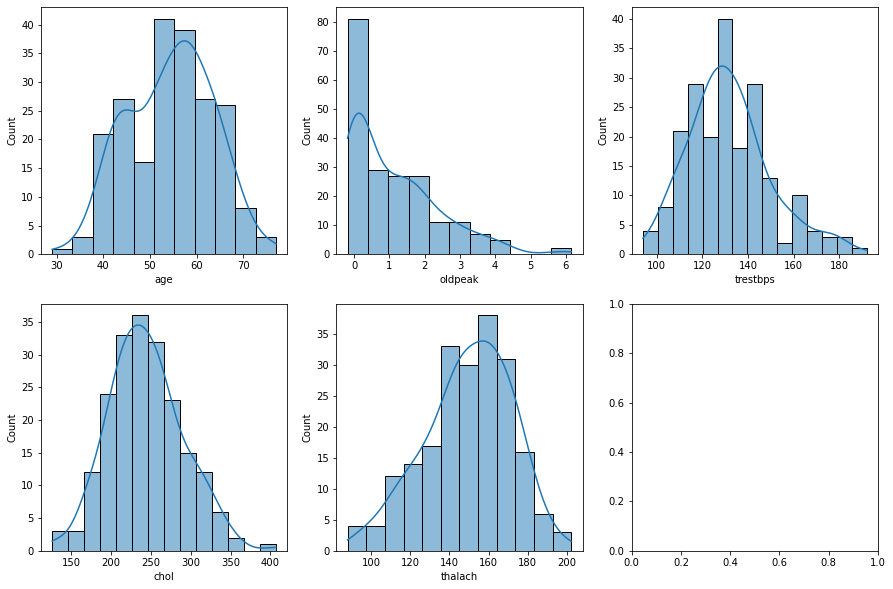

In [102]:
fig, axs = plt.subplots(2,3, figsize=(15, 10))
axs = axs.flatten()
index = 0
for feature in nums:
    sns.histplot(data = heart_dataset[feature], ax= axs[index], kde = True)
    index+=1

Observations:
1. As The skewness most of these features lies between +0.5 to -0.5 , we can infer that all of them have fairly symmetrical distributions except oldpeak which has a distribution with skewness of 1.22.
2. An intersting point here is that oldpeak has a mean value of 1.1 with values lying between the range 0 to 6. This mean value is fairly smaller in value in value when compared with other features. We need to apply normalisation to ensure that all the features have values in the similar range. This is because KNN is based on distance and it is important to have features on the similar scale.
3. Among all the features, chol with the maximum variance is most widely spread for the samples in the dataset.
4. Analysing the kurtosis of the features, oldpeak , trestbps and chol with a positive value of kurtosis have a higher degree of peakedness than a normal curve whereas age and thalach have lower peakedness as they have negative kutosis.


### [CM3] Heart: Are there any notable outliers in the data that should be removed? Provide a short justification for your answer in plots and/or words.

<AxesSubplot:>

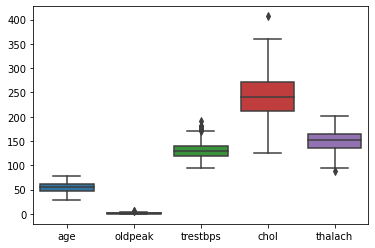

In [20]:
sns.boxplot(data = heart_dataset[nums])

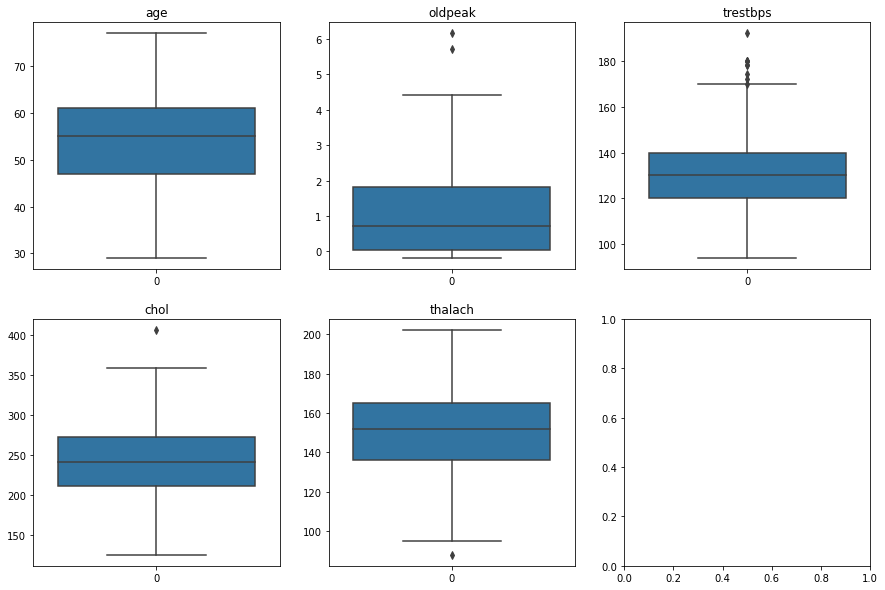

In [21]:
# nums = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
fig, axs = plt.subplots(2,3, figsize=(15, 10))
axs = axs.flatten()
index = 0
for feature in nums:
    sns.boxplot(data = heart_dataset[feature], ax= axs[index])
    axs[index].title.set_text(feature)
    index+=1

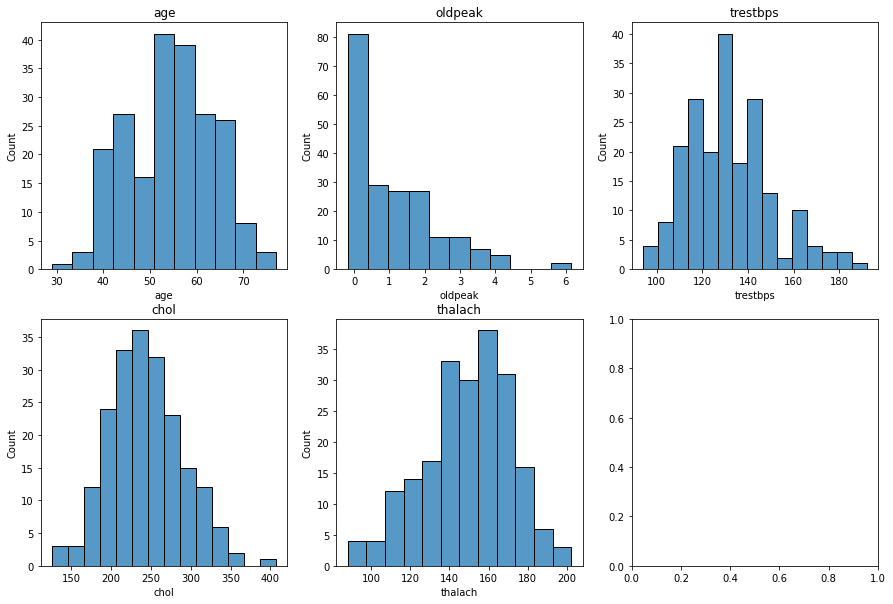

In [228]:
# nums = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
fig, axs = plt.subplots(2,3, figsize=(15, 10))
axs = axs.flatten()
index = 0
for feature in nums:
    sns.histplot(data = heart_dataset[feature], ax= axs[index])
    axs[index].title.set_text(feature)
    index+=1

To detect the outliers in the data, we plot a boxplot and histogram of the features in the dataset.
Boxplot indicates that there there are are outliers for all the features except age. Thease are the points lying outside the 1.5 IQR(Inter-Quartile Range).
1. While we can remove the outliers for oldpeak and chol, as these points lie on the extreme right of the histogram and these values lie significantly far from rest of the distribution.
2. We can keep the outliers for trsetbps and thalach, since they are fairly close to rest of the data points and we might loose some useful information by dropping them.

### [CM4] Heart: Group the features by their variable types and plot a histogram of the features to determine the number of present and absent heart disease cases.

In [22]:
bins = ['sex', 'fbs', 'exang']
cats = ['cp', 'restecg', 'slope', 'thal']
ords = ['ca']
nums = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
target = ['target']

#### Numeric features

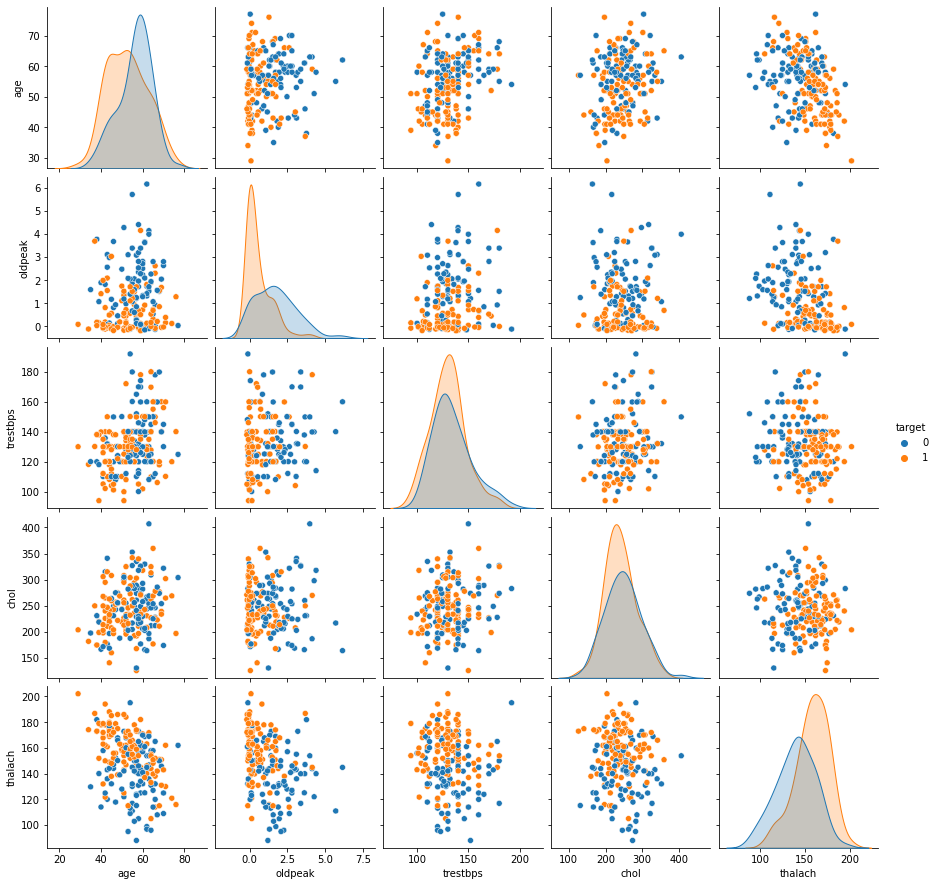

In [23]:
sns.pairplot(heart_dataset[nums+target],hue = 'target' )

#### Categorical features

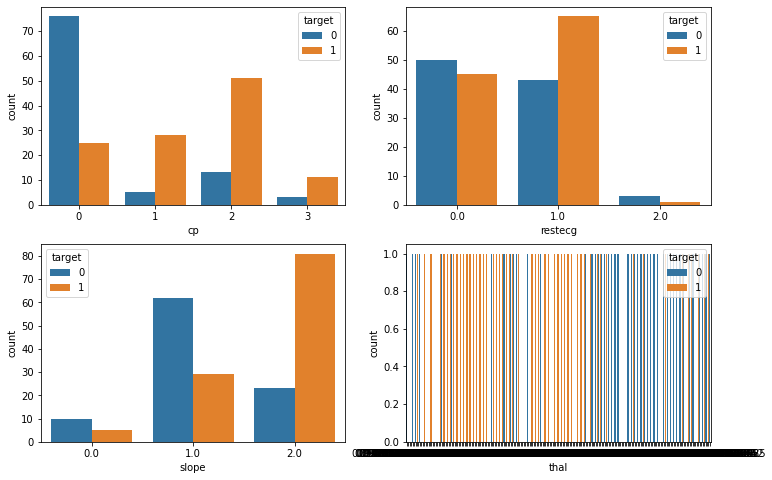

In [24]:
fig, axs = plt.subplots(2,2, figsize=(12, 8))
axs = axs.flatten()
index = 0
for feature in cats:
    sns.countplot(data = heart_dataset, x = feature, hue= 'target', ax= axs[index])
    index+=1

Here, we see that 'thal' feature has numeric values instead of categorical, this extra noise in the data will be handled as part of data cleaning

#### Binary features

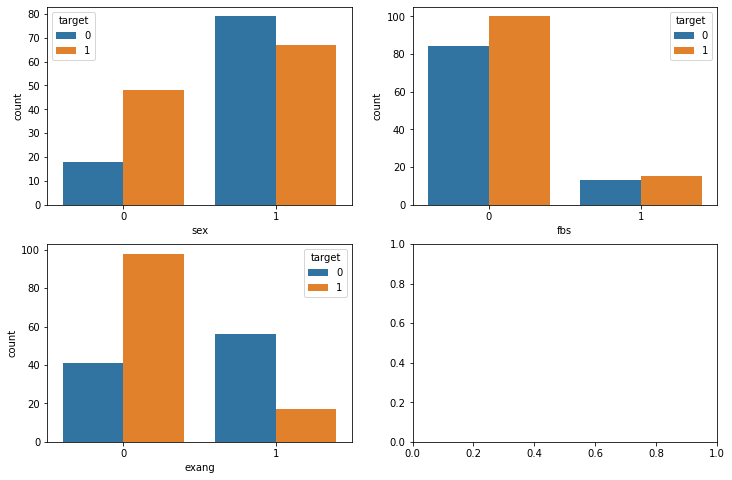

In [25]:
fig, axs = plt.subplots(2,2, figsize=(12, 8))
axs = axs.flatten()
index = 0
for feature in bins:
    sns.countplot(data = heart_dataset, x = feature, hue= 'target', ax= axs[index])
    index+=1

#### Ordinal Features

<AxesSubplot:xlabel='ca', ylabel='count'>

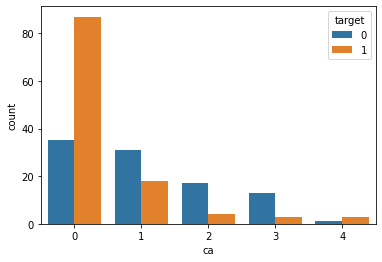

In [116]:
sns.countplot(data = heart_dataset, x = 'ca', hue= 'target')

### [CM5] Heart: Data Cleaning: deal with any missing values in the data (use any of the methods discussed in class: dropping data, interpolating, replacing with approximations,. ). You can also remove any noise from the data by applying smoothing on some features. Report any changes you make and justify them. You can make comparisons if any of these approaches have an impact on classification performance using your validation set.

#### Handling missing values

<AxesSubplot:>

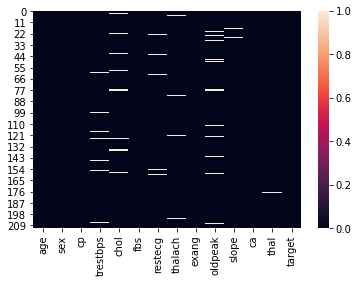

In [7]:
sns.heatmap(heart_dataset.isnull())

In [8]:
heart_dataset.isnull().sum()

age          0
sex          0
cp           0
trestbps     7
chol        10
fbs          0
restecg      5
thalach      4
exang        0
oldpeak     12
slope        2
ca           0
thal         1
target       0
dtype: int64

We see that a good proportion of data (15-20%) is missing and dropping these values might lead to loss of useful information. Thus we need to find a proper way to impute these values. Let us analyse first the numeric features:

As Analysed in CM2,
1. Among numerical features, 'oldpeak' and 'trestbps' have skewness and outliers in their distribution, so we choose median imputation.
2. And since 'chol' and 'thalach' have near-symmetric distribution without any significant outliers, we choose mean imputation for them.

In [9]:
## Filling missing entries by median
heart_dataset['oldpeak'] = heart_dataset['oldpeak'].fillna(heart_dataset['oldpeak'].median())
heart_dataset['trestbps'] = heart_dataset['trestbps'].fillna(heart_dataset['trestbps'].median())
## Filling missing entries by mean
heart_dataset['chol'] = heart_dataset['chol'].fillna(heart_dataset['chol'].mean())
heart_dataset['thalach'] = heart_dataset['thalach'].fillna(heart_dataset['thalach'].mean())

In [10]:
# nums = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
heart_dataset[nums].isnull().sum()

age         0
oldpeak     0
trestbps    0
chol        0
thalach     0
dtype: int64

Handling missing values for Categorical, Ordinal and Binary features:

In [11]:
# bins = ['sex', 'fbs', 'exang']
# cats = ['cp', 'restecg', 'slope', 'thal']
# ords = ['ca']
heart_dataset[cats+bins+ords].isnull().sum()

cp         0
restecg    5
slope      2
thal       1
sex        0
fbs        0
exang      0
ca         0
dtype: int64

Since these are categorical in nature and modying them with the most frequest label/category might lead to distortion in the data.
We will delete these values since they are lesser in number

In [12]:
heart_dataset = heart_dataset.dropna()

Now our data does not contain any missing values, as verified by the following heatmap:

<AxesSubplot:>

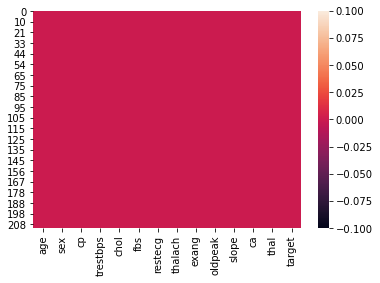

In [13]:
sns.heatmap(heart_dataset.isnull())

#### Removing Noise in the data

Analysing 'thal' feature, we see that although it is supposed to be categorical in nature, there is a lot of noise in the samples as they have numeric values. to eliminate the noise we can round off these values to nearest integer.

In [14]:
heart_dataset['thal'] = heart_dataset['thal'].round()

Next we realise that a few features like 'restecg' and 'slope' have floating point values. As they are categorical features, we convert these values to integer for better understanding of the data.

In [15]:
heart_dataset[['restecg', 'slope', 'thal']] = heart_dataset[['restecg', 'slope', 'thal']].applymap(int)

In [16]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2,115.952071,0,1.284822,1,0,2,1
1,43,0,0,132.079599,341.049462,1,0,135.970028,1,3.110483,1,0,3,0
2,47,1,2,107.899290,242.822816,0,1,152.210039,0,-0.023723,2,0,2,0
3,51,1,2,99.934001,244.133256,0,1,143.049207,1,1.195082,1,0,2,1
4,57,1,0,110.103508,334.952353,0,1,143.099327,1,3.082052,1,1,3,0


#### Dealing with outliers

<AxesSubplot:>

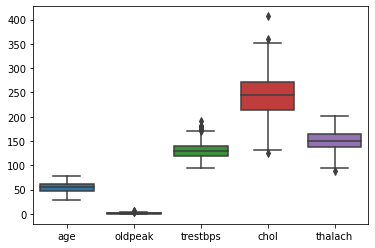

In [17]:
sns.boxplot(data = heart_dataset[nums])

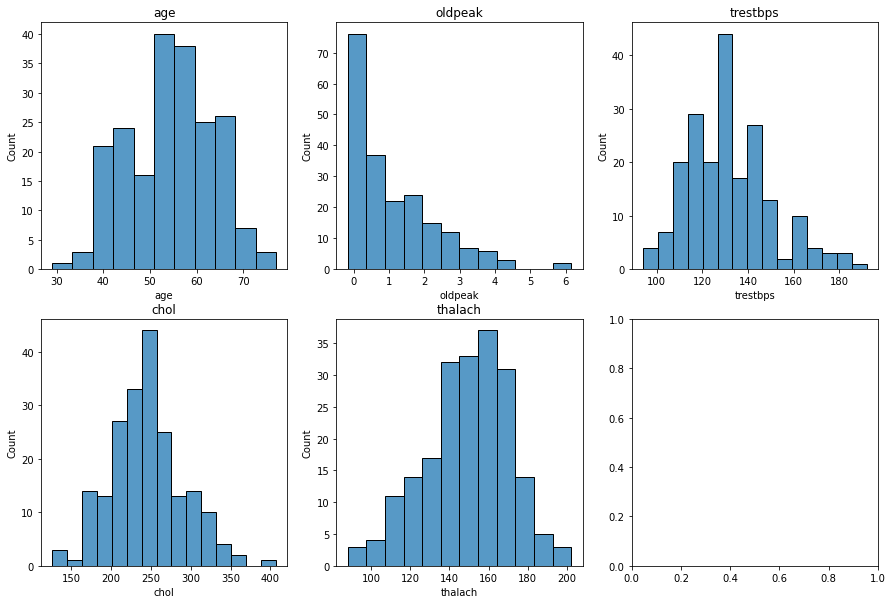

In [18]:
# nums = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,3, figsize=(15, 10))
axs = axs.flatten()
index = 0
for feature in nums:
    sns.histplot(data = heart_dataset[feature], ax= axs[index])
    axs[index].title.set_text(feature)
    index+=1

To detect the outliers in the data, we plot a boxplot and histogram of the features in the dataset.
Boxplot indicates that there there are are outliers for all the features except age. Thease are the points lying outside the 1.5 IQR(Inter-Quartile Range).
1. While we can remove the outliers for oldpeak and chol, as these points lie on the extreme right of the histogram and these values lie significantly far from rest of the distribution.
2. We can keep the outliers for trsetbps and thalach, since they are fairly close to rest of the data points and we might loose some useful information by dropping them.

<AxesSubplot:>

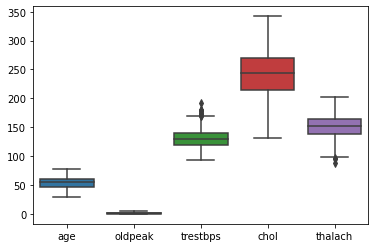

In [19]:
## handling outliers
cleaned_heart_dataset = heart_dataset
for feature in ['oldpeak','chol']:
    Q1 = cleaned_heart_dataset[feature].quantile(0.25)
    Q3 = cleaned_heart_dataset[feature].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (cleaned_heart_dataset[feature] >= Q1 - 1.5 * IQR) & (cleaned_heart_dataset[feature] <= Q3 + 1.5 *IQR)
    cleaned_heart_dataset = cleaned_heart_dataset.loc[filter]

sns.boxplot(data = cleaned_heart_dataset[nums])

Now that we have cleaned our data from missing values and outliers, we can now apply classification algorithm on it. We will apply KNN only on the subset of the features we selected in the Q1.

### Question 2: KNN

#### 1. Divide the data into train, validation, and test sets (60%, 20%, 20%) Note: set the random seed for splitting, use random state=275 in the sci-kit learn train test split function to get the same split every time you run the program.

In [20]:
## feature subset as selected in Q1
feature_subset = ['thalach', 'oldpeak', 'cp', 'ca' , 'slope']
subset_data = cleaned_heart_dataset[feature_subset + target]
subset_data.head()

,thalach,oldpeak,cp,ca,slope,target
0,115.952071,1.284822,2,0,1,1
1,135.970028,3.110483,0,0,1,0
2,152.210039,-0.023723,2,0,2,0
3,143.049207,1.195082,2,0,1,1
4,143.099327,3.082052,0,1,1,0


In [21]:
from sklearn.model_selection import train_test_split
X = subset_data.drop('target', axis = 1)
y = subset_data['target']

## First splitting the data into train_val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=275)

## Then we split the train_val data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=275)

In [66]:
# Verifying the number of entries in Train, Validation and Test sets
display(X_train.count())
display(X_val.count())
display(X_test.count())

thalach    117
oldpeak    117
cp         117
ca         117
slope      117
dtype: int64

thalach    39
oldpeak    39
cp         39
ca         39
slope      39
dtype: int64

thalach    40
oldpeak    40
cp         40
ca         40
slope      40
dtype: int64

#### 2.Train the model with the classifier's default parameters. Use the train set and test the model on the test set. Store the accuracy of the model.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[13  6]
 [ 8 13]]


In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65        19
           1       0.68      0.62      0.65        21

    accuracy                           0.65        40
   macro avg       0.65      0.65      0.65        40
weighted avg       0.65      0.65      0.65        40



In [24]:
print(accuracy_score(y_test,predictions))

0.65


It is observed that classifying the data with KNN (default configuration) on a subset of features gives us an accuracy of around 65% on the test set

### 3. Find the best parameter for the classifier

### [CM6] Heart: When you finish trying all the possible parameter, plot a figure that shows the validation relationship between the accuracy and the parameter. Report the best k in terms of classification accuracy.

In [25]:
# Testing the following k-values for validation
k_values = [1,5,10,15,20,25,30,35]
# Storing the accuracies for different k-values in the following list
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_val)
    accuracies.append(accuracy_score(y_val,predictions))

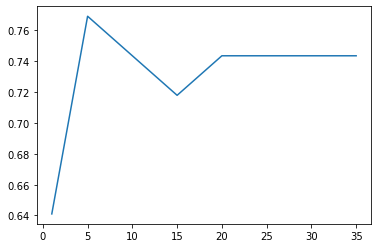

In [26]:
import matplotlib.pyplot as plt
plt.plot(k_values, accuracies)

From the above graph we observe that using k =5 gives us the best classification accuracy of 78% on the validation set

### [CM7] Heart: Now, using the best found parameters, fit the model using the training set and predict the target on the test set. Report the accuracy, AUC, f-score of your kNN classifier.

In [27]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
#Using k = 5 as it gave best accuracy on the validation set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
auc_score = roc_auc_score(y_test, predictions)
print('Accuracy : {accuracy}'.format(accuracy = accuracy_score(y_test,predictions)))
print('F1 Score : {f1_score}'.format(f1_score = f1_score(y_test, predictions)))
print('AUC :{AUC}'.format(AUC = auc_score))

Accuracy : 0.65
F1 Score : 0.6500000000000001
AUC :0.6516290726817042


### Normalization: Normalize the data using methods we discussed and explain what you used and explain briefly what worked best. 

We will try min-max normalisation and standardisation, and then check which of them works well on the validation set

1. Trying min-max normalization on the data:

In [28]:
# nums = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
subset_nums = ['thalach', 'oldpeak']
# We will apply min-max normalisation and see its impact on the validation set
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()

X_train_minmax = X_train.copy()
X_val_minmax = X_val.copy()

# Applying normalisation on training and validation set -- only on numerical columns
X_train_minmax[subset_nums] = mm_scaler.fit_transform(X_train[subset_nums])
X_val_minmax[subset_nums] = mm_scaler.transform(X_val[subset_nums])

# Training the scaled data with KNN (Using k = 5 as it was selected as the best k value in the previous step)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax, y_train)
predictions = knn.predict(X_val_minmax)
print('Accuracy : {accuracy}'.format(accuracy = accuracy_score(y_val,predictions)))
print('F1 Score : {f1_score}'.format(f1_score = f1_score(y_val, predictions)))

Accuracy : 0.8205128205128205
F1 Score : 0.851063829787234


2. Trying standardization on the data:

In [29]:
#nums = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
subset_nums = ['thalach', 'oldpeak']
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()

X_train_std = X_train.copy()
X_val_std = X_val.copy()

# Applying standardization on training and validation set -- only on numerical columns
X_train_std[subset_nums] = standard_scaler.fit_transform(X_train[subset_nums])
X_val_minmax[subset_nums] = standard_scaler.transform(X_val[subset_nums])

# Training the scaled data with KNN (Using k = 5 as it was selected as the best k value in the previous step)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
predictions = knn.predict(X_val_std)
print('Accuracy : {accuracy}'.format(accuracy = accuracy_score(y_val,predictions)))
print('F1 Score : {f1_score}'.format(f1_score = f1_score(y_val, predictions)))

Accuracy : 0.5897435897435898
F1 Score : 0.7419354838709677


We see that using min-max normalisation gives us better results on the validation set. Thus we will use min-max normalisation.

### Weighted KNN: The KNeighborsClassifier class has an option for weighted KNN where points that are nearby to the query point are more important for the classification than others. Try using different weighting schemes (default, manhatten, eculidean) to see the effect. You can also define your own distance metric to try to improve performance further (testing on validation only of course).

Trying different weighting schemes and checking their performance on validation set

Using Default values (Eucledian or Minkowski Metric with p=2)

In [35]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_minmax, y_train)
predictions = knn.predict(X_val_minmax)
auc_score = roc_auc_score(y_val, predictions)
print('Accuracy : {accuracy}'.format(accuracy = accuracy_score(y_val,predictions)))
print('F1 Score : {f1_score}'.format(f1_score = f1_score(y_val, predictions)))
print('AUC :{AUC}'.format(AUC = auc_score))

Accuracy : 0.7692307692307693
F1 Score : 0.8
AUC :0.7663043478260869


Using Minkowski metric with p =1 or Manhattan:

In [36]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'manhattan' , weights='distance')
knn.fit(X_train_minmax, y_train)
predictions = knn.predict(X_val_minmax)
auc_score = roc_auc_score(y_val, predictions)
print('Accuracy : {accuracy}'.format(accuracy = accuracy_score(y_val,predictions)))
print('F1 Score : {f1_score}'.format(f1_score = f1_score(y_val, predictions)))
print('AUC :{AUC}'.format(AUC = auc_score))

Accuracy : 0.7948717948717948
F1 Score : 0.8260869565217391
AUC :0.7880434782608696


We observe that using manhattan metric gives us a much better accuracy and F1 score on our validation set, thus we use manhattan metric.

### [CM7] Heart: After making these improvements compute your new classification results on the test set and report the accuracy, AUC and f-score.

In [34]:
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score

mm_scaler = preprocessing.MinMaxScaler()

X_train_minmax = X_train.copy()
X_test_minmax = X_test.copy()

# Applying normalisation on training and test set -- only on numerical columns
X_train_minmax[subset_nums] = mm_scaler.fit_transform(X_train[subset_nums])
X_test_minmax[subset_nums] = mm_scaler.transform(X_test[subset_nums])

knn = KNeighborsClassifier(n_neighbors=5, metric = 'manhattan' , weights='distance')
knn.fit(X_train_minmax, y_train)
predictions = knn.predict(X_test_minmax)
auc_score = roc_auc_score(y_test, predictions)

print('Accuracy : {accuracy}'.format(accuracy = accuracy_score(y_test,predictions)))
print('F1 Score : {f1_score}'.format(f1_score = f1_score(y_test, predictions)))
print('AUC :{AUC}'.format(AUC = auc_score))

Accuracy : 0.75
F1 Score : 0.7727272727272727
AUC :0.7468671679197996


After making all the improvements , we saw that our accuracy on test set increased from 65 % to 75%.
Note: Using all the features(instead of using only a subset) gives us a higher accuracy, and thus kaggle submission has been done using all the features available.